#### persistance in langgraph

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()
llm = ChatOpenAI()

In [13]:
class Jokestate(TypedDict):
    joke: str
    topic: str
    explanation: str

In [14]:
def generate_joke(state: Jokestate):
    topic = state['topic']
    response = llm.invoke(f"Generate a joke about {topic}").content
    return {'joke': response}



In [15]:
def generate_explanation(state: Jokestate):
    joke = state['joke']
    response = llm.invoke(f"Explain the following joke: {joke}").content
    return {'explanation': response}

In [16]:
graph = StateGraph(Jokestate)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)
               
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

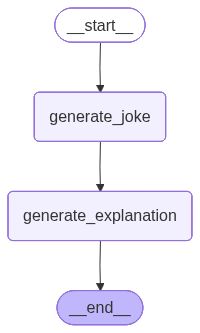

In [17]:
workflow

In [18]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':"pizza"}, config=config1)

{'joke': 'Why did the pizza go to the doctor? Because it was feeling too cheesy!',
 'topic': 'pizza',
 'explanation': 'This joke is a play on words, as "cheesy" can mean both having a strong smell or taste of cheese, as well as being corny or overly sentimental. In this case, the pizza went to the doctor because it was feeling too cheesy, meaning it was feeling too corny or sentimental. It is a humorous and light-hearted way to suggest that the pizza was feeling overly emotional.'}

In [19]:
workflow.get_state(config1)

StateSnapshot(values={'joke': 'Why did the pizza go to the doctor? Because it was feeling too cheesy!', 'topic': 'pizza', 'explanation': 'This joke is a play on words, as "cheesy" can mean both having a strong smell or taste of cheese, as well as being corny or overly sentimental. In this case, the pizza went to the doctor because it was feeling too cheesy, meaning it was feeling too corny or sentimental. It is a humorous and light-hearted way to suggest that the pizza was feeling overly emotional.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd8c-5958-6d17-8002-5a9746498afa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-17T08:15:08.095003+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd8c-5008-6e5c-8001-7c4155603e89'}}, tasks=(), interrupts=())

In [22]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'joke': 'Why did the pizza go to the doctor? Because it was feeling too cheesy!', 'topic': 'pizza', 'explanation': 'This joke is a play on words, as "cheesy" can mean both having a strong smell or taste of cheese, as well as being corny or overly sentimental. In this case, the pizza went to the doctor because it was feeling too cheesy, meaning it was feeling too corny or sentimental. It is a humorous and light-hearted way to suggest that the pizza was feeling overly emotional.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd8c-5958-6d17-8002-5a9746498afa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-17T08:15:08.095003+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd8c-5008-6e5c-8001-7c4155603e89'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'joke': 'Why did the pizza go to the doctor? Because it was feeling too cheesy!

In [24]:
config1 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':"pasta"}, config=config1)

{'joke': 'Why did the pasta go to the party? Because it was feeling alfredo-cious!',
 'topic': 'pasta',
 'explanation': 'This joke is a play on words. "Alfredo" is a type of sauce commonly used with pasta dishes, and it sounds similar to the word "all ready." So, the joke is saying that the pasta went to the party because it was feeling "alfredo-cious" or "all ready to be delicious." It\'s a lighthearted and punny way to explain why the pasta attended the party.'}

In [25]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'joke': 'Why did the pasta go to the party? Because it was feeling alfredo-cious!', 'topic': 'pasta', 'explanation': 'This joke is a play on words. "Alfredo" is a type of sauce commonly used with pasta dishes, and it sounds similar to the word "all ready." So, the joke is saying that the pasta went to the party because it was feeling "alfredo-cious" or "all ready to be delicious." It\'s a lighthearted and punny way to explain why the pasta attended the party.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd94-2b7d-6254-8006-bd408386c08e'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-02-17T08:18:38.034798+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10bd94-1efc-6cb1-8005-1308cf7ab9fd'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'joke': 'Why did the pasta go to the party? Because it was feeling alfredo-cious!', 'topic': 'pas